In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:


import numpy as np 
import pandas as pd



In [4]:
Dataset = pd.read_csv("/content/drive/MyDrive/frames/4K - Sheet1.csv")    

In [8]:
Dataset["label"] = Dataset["label"].astype(str)

In [9]:
Dataset["name"] = Dataset["name"].astype(str)

In [10]:
Dataset.head()

,name,label
0,1.jpg,3
1,2.jpg,3
2,3.jpg,1
3,4.jpg,3
4,5.jpg,2


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

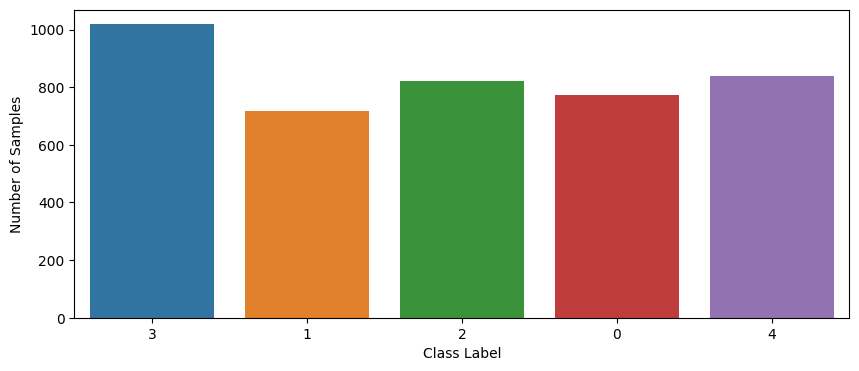

In [12]:

fig, ax = plt.subplots(figsize = (10, 4))                                
sns.countplot(x ='label', data=Dataset)                                  
plt.xlabel("Class Label")                                                
plt.ylabel("Number of Samples")                                          
plt.show() 

## Splitting Data into Train/Test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
Data_train, Data_test = train_test_split(Dataset, test_size=0.2)                   

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(rescale=1./255)                            

In [ ]:
! unzip drive/MyDrive/frames/frames.zip

Streaming output truncated to the last 5000 lines.
  inflating: frames/3663.jpg         
  inflating: frames/3664.jpg         
  inflating: frames/3665.jpg         
  inflating: frames/3666.jpg         
  inflating: frames/3667.jpg         
  inflating: frames/3668.jpg         
  inflating: frames/3669.jpg         
  inflating: frames/367.jpg          
  inflating: frames/3670.jpg         
  inflating: frames/3671.jpg         
  inflating: frames/3672.jpg         
  inflating: frames/3673.jpg         
  inflating: frames/3674.jpg         
  inflating: frames/3675.jpg         
  inflating: frames/3676.jpg         
  inflating: frames/3677.jpg         
  inflating: frames/3678.jpg         
  inflating: frames/3679.jpg         
  inflating: frames/368.jpg          
  inflating: frames/3680.jpg         
  inflating: frames/3681.jpg         
  inflating: frames/3682.jpg         
  inflating: frames/3683.jpg         
  inflating: frames/3684.jpg         
  inflating: frames/3685.jpg         

In [ ]:

dir1='/content/frames'

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Train data generator with augmentation
train_gen = datagen.flow_from_dataframe(
    dataframe=Data_train,           
    directory=dir1,                   
    batch_size=30,                    
    class_mode="categorical",         
    x_col="name",                     
    color_mode="rgb",                 
    y_col="label",                    
    target_size=(224,224)
)

# Validation data generator without augmentation
valid_gen = datagen.flow_from_dataframe(
    dataframe=Data_test,            
    directory=dir1,                  
    batch_size=30,                    
    class_mode="categorical",        
    x_col="name",                     
    color_mode="rgb",                
    y_col="label",                    
    target_size=(224,224)
)


Found 4800 validated image filenames belonging to 5 classes.
Found 1200 validated image filenames belonging to 5 classes.


In [ ]:
import keras
from tensorflow.keras import applications

In [ ]:
ResNet_model = keras.applications.ResNet152V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

234545216/234545216 [==============================] - 1s 0us/step


## Building Model

In [ ]:
from keras import Model 
from keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D
from keras.models import Sequential

In [ ]:
for layer in ResNet_model.layers[:-15]:       
    layer.trainable = False
accuracy=92
x = ResNet_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.5)(x)
output  = Dense(units=5, activation='softmax')(x)
model = Model(ResNet_model.input, output)

In [ ]:
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

### Setting Loss function, Optimizer and Compling the model

In [ ]:
loss = keras.losses.CategoricalCrossentropy()
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=loss, metrics= ['accuracy'])

### Compiling the Model

In [ ]:
STEP_SIZE_TRAIN=train_gen.n//train_gen.batch_size
STEP_SIZE_VALID=valid_gen.n//valid_gen.batch_size

print(STEP_SIZE_TRAIN)
print(STEP_SIZE_VALID)


160
40


In [ ]:
transfer_learning_history = model.fit_generator(generator=train_gen,
                            steps_per_epoch=STEP_SIZE_TRAIN,
                            validation_data=valid_gen,
                            validation_steps=STEP_SIZE_VALID,
                            epochs=5)

<ipython-input-23-683ada8cab79>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  transfer_learning_history = model.fit_generator(generator=train_gen,


Epoch 1/5
160/160 [==============================] - 172s 941ms/step - loss: 1.2279 - accuracy: 0.5729 - val_loss: 2.7376 - val_accuracy: 0.5683
Epoch 2/5
160/160 [==============================] - 146s 915ms/step - loss: 1.1001 - accuracy: 0.6252 - val_loss: 1.1916 - val_accuracy: 0.6000
Epoch 3/5
160/160 [==============================] - 158s 989ms/step - loss: 1.0403 - accuracy: 0.6342 - val_loss: 1.1304 - val_accuracy: 0.6242
Epoch 4/5
160/160 [==============================] - 145s 904ms/step - loss: 0.9883 - accuracy: 0.6544 - val_loss: 1.0830 - val_accuracy: 0.6250
Epoch 5/5
160/160 [==============================] - 145s 910ms/step - loss: 0.9702 - accuracy: 0.6608 - val_loss: 1.2965 - val_accuracy: 0.6300


## Visualizing accuracy and loss

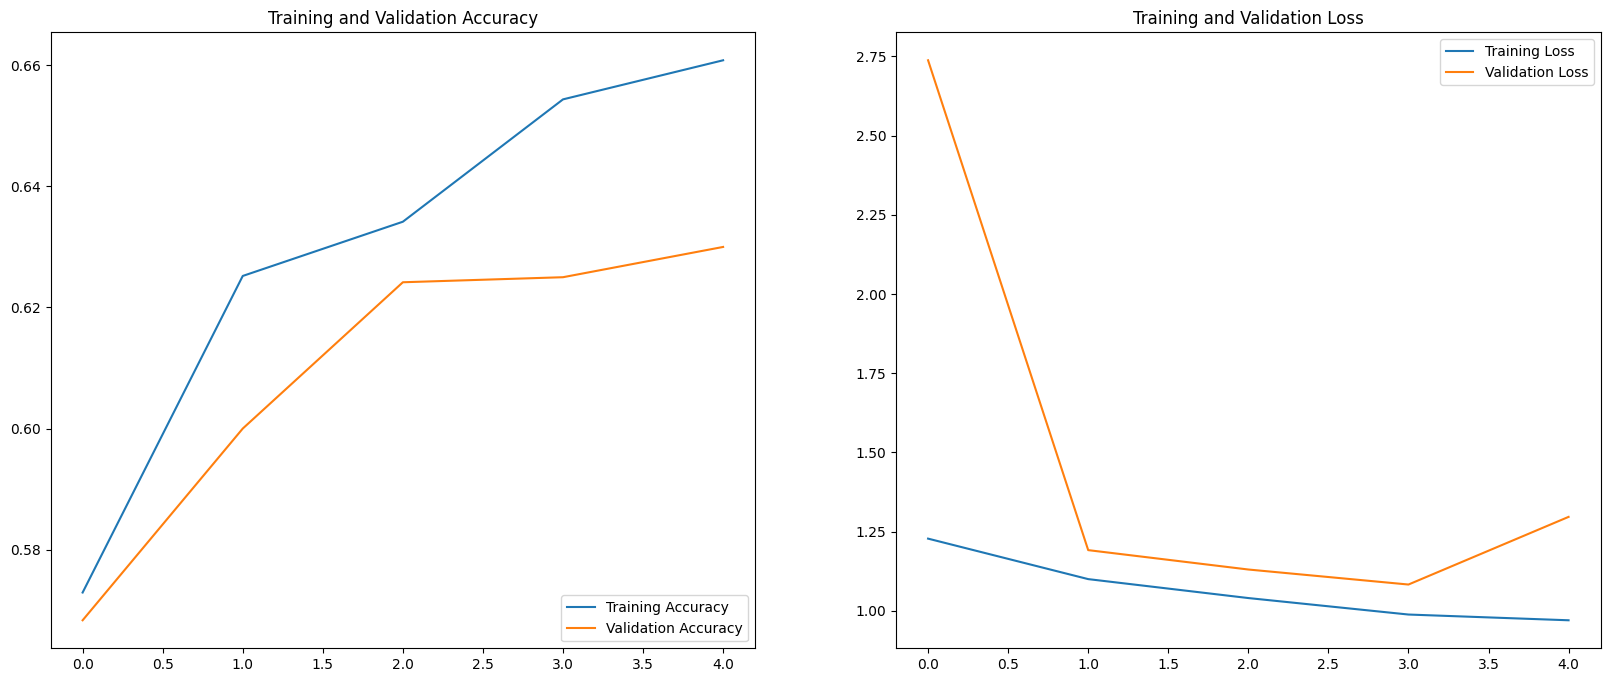

In [ ]:
import matplotlib.pyplot as plt

acc = transfer_learning_history.history['accuracy']
val_acc = transfer_learning_history.history['val_accuracy']

loss = transfer_learning_history.history['loss']
val_loss = transfer_learning_history.history['val_loss']

epochs_range = range(5)

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# save the model to a file
model.save('/content/drive/MyDrive/my_model.h5')